In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [4]:
customer_df = pd.read_csv('customers.csv', index_col='CustomerID')
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
customer_df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
customer_df.drop_duplicates(inplace=True)

In [8]:
# Saving only Spending_Score and income values into X.
X = customer_df.iloc[:, [2, 3]].values

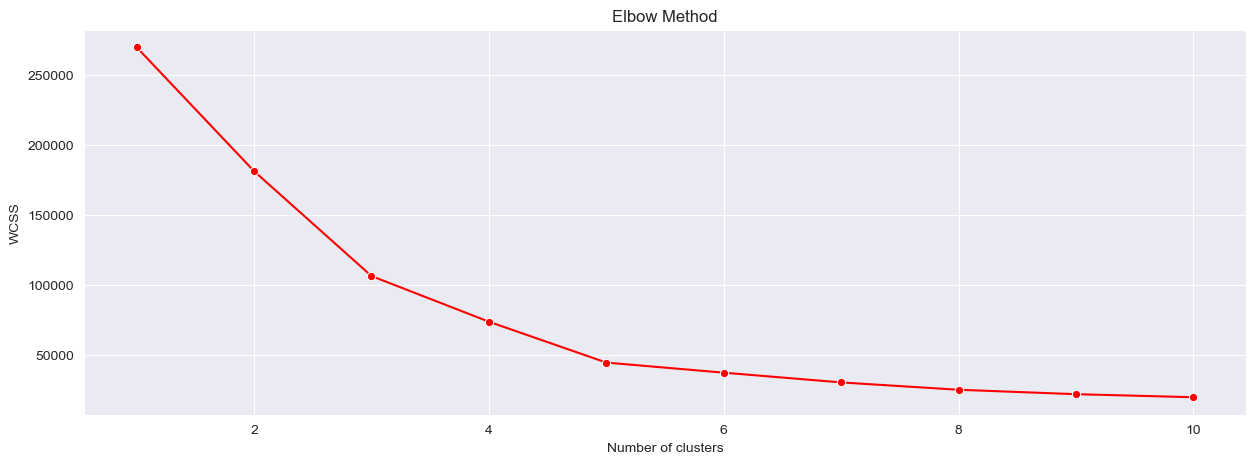

In [9]:
from sklearn.cluster import KMeans

# where we'll store all of the wcss values for plotting later.
wcss = []
for i in range(1, 11):
    # random_state just to ensure we get the same values in the end.
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)

# creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

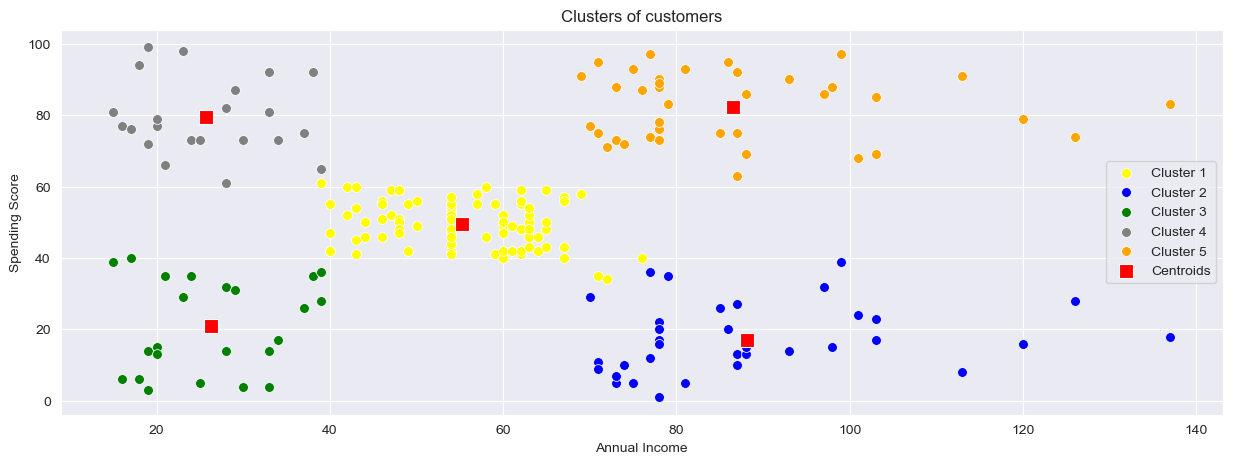

In [11]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [12]:
wine_df = pd.read_csv('wine_quality.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.182611
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.874886
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.755772
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5.783057
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.199293


In [13]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [14]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.638044
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.818458
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.948026
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.017043
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.786944
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.096932
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.240683


In [15]:
#drops duplicate values
wine_df.drop_duplicates(inplace=True)

In [16]:

X = wine_df.iloc[:, [2, 3]].values

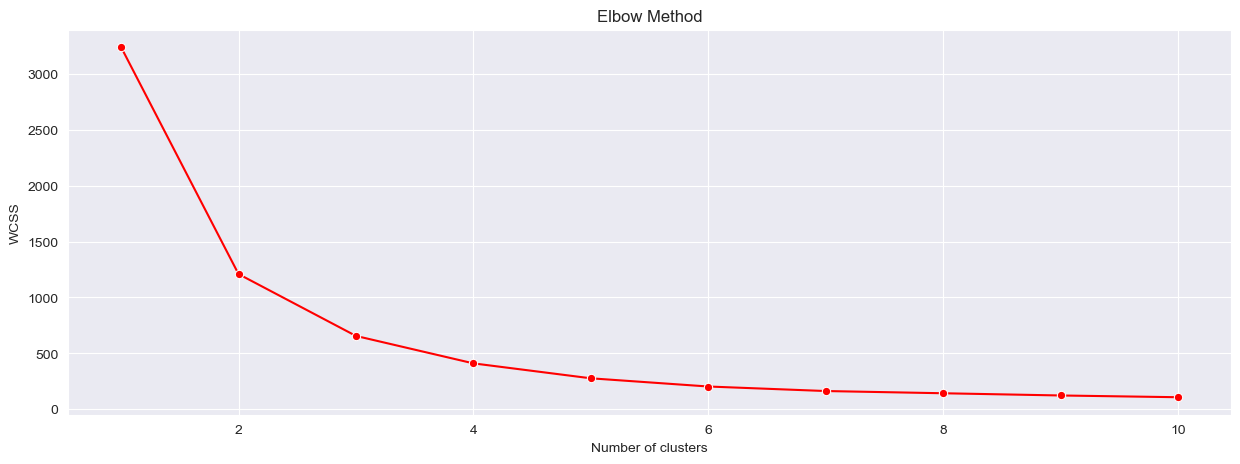

In [17]:
from sklearn.cluster import KMeans

# where we'll store all of the wcss values for plotting later.
wcss = []
for i in range(1, 11):
    # random_state just to ensure we get the same values in the end.
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)

# creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

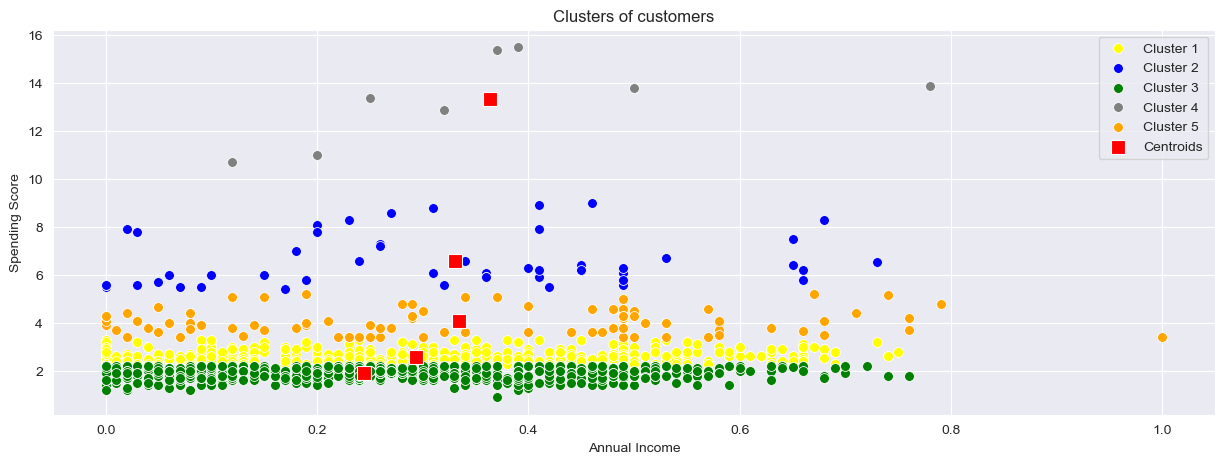

In [19]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()